KNN
K-nearest Neighbours with (dist,idx): [(2.0, 2), (2.0, 3), (2.8284271247461903, 5)]
Labels of KNNs: [1, 1, 0]
Final Label: 1
KNN-Distance Weighted
K-nearest Neighbours with (dist,idx): [(2.0, 2), (2.0, 3), (2.8284271247461903, 5)]
Labels of KNNs: [1, 1, 0]
K-weights: [(0.5, 2), (0.5, 3), (0.35355339059327373, 5)]
One Label Weight: 1.0
Zero Label Weight: 0.35355339059327373
Final Label: 1
KNN-Locally Weighted Average
K-nearest Neighbours with (dist,idx): [(2.0, 2), (2.0, 3), (2.8284271247461903, 5)]
Labels of KNNs: [1, 1, 0]
K-weights: [(0.5, 2), (0.5, 3), (0.35355339059327373, 5)]
One Label Weight: 1.0
Zero Label Weight: 0.35355339059327373
One Label Average: 0.5
Zero Label Average: 0.35355339059327373
Final Label: 1


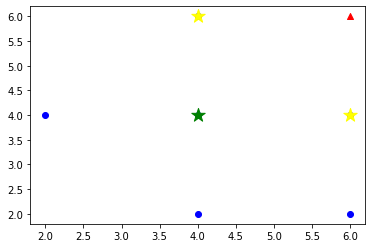

In [20]:
import math
from statistics import mode
import matplotlib.pyplot as plt

def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2))

def knn(datapoints,query_point,labels,k):
    #Query-point coordinates
    xq=query_point[0][0]
    yq=query_point[0][1]

    #calculate distance of query_point from all datapoints
    #store as (dist,idx)
    distances=[]

    idx=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist=euclidean_distance(x,y,xq,yq)

        distances.append((dist,idx))

        idx+=1

    #now get least-k distances
    k_distances=[]

    distances.sort()

    #storing least-k distance in k_distances (dist,idx)
    k_distances=distances[:k]

    print("K-nearest Neighbours with (dist,idx):",k_distances)

    #Get labels of the k-nearest
    k_labels=[]

    for dist,idx in k_distances:
        k_labels.append(labels[idx])

    print("Labels of KNNs:",k_labels)

    #Get mode of k_labels as final_label
    final_label=mode(k_labels)

    print("Final Label:",final_label)

    # Graph

    xp = [d[0] for d in datapoints]
    yp = [d[1] for d in datapoints]

    xn0 = []
    yn0 = []
    xn1 = []
    yn1 = []

    itr = 0
    for dist,idx in k_distances:
        if k_labels[itr] == 0:
            xn0.append(xp[idx])
            yn0.append(yp[idx])
        else:
            xn1.append(xp[idx])
            yn1.append(yp[idx])
        itr+=1

    plt.scatter(xp,yp,c='blue')
    plt.scatter(xq,yq, marker='^',c='red')
    plt.scatter(xn0,yn0,marker='*',c='green',s=200)
    plt.scatter(xn1,yn1,marker='*',c='yellow',s=200)

def knn_distance_weighted(datapoints,query_point,labels,k):
    #Query-point coordinates
    xq=query_point[0][0]
    yq=query_point[0][1]

    #calculate distance of query_point from all datapoints
    #store as (dist,idx)
    distances=[]

    idx=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist=euclidean_distance(x,y,xq,yq)

        distances.append((dist,idx))

        idx+=1

    #now get least-k distances
    k_distances=[]

    distances.sort()

    #storing least-k distance in k_distances (dist,idx)
    k_distances=distances[:k]

    print("K-nearest Neighbours with (dist,idx):",k_distances)

    #Get labels of the k-nearest
    k_labels=[]

    for dist,idx in k_distances:
        k_labels.append(labels[idx])

    print("Labels of KNNs:",k_labels)

    #Calculate k_weights for each of the k-nearest distances
    k_weights=[]

    for (dist,idx) in k_distances:
        wt=1/dist
        k_weights.append((wt,idx))

    print("K-weights:",k_weights)

    #Now, add weights acc to labels to find maximum
    one_label_weight=0
    zero_label_weight=0

    #go thru all the k_labels,
    # if label is 0, add to zero_label_wt
    # else add to one_label_wt
    for i in range(len(k_labels)):
        if k_labels[i]==0:
            zero_label_weight+=k_weights[i][0]
        else:
            one_label_weight+=k_weights[i][0]

    print("One Label Weight:",one_label_weight)
    print("Zero Label Weight:",zero_label_weight)

    final_label=0

    #Compare both weights and assign final label
    if one_label_weight>=zero_label_weight:
        final_label=1
    else:
        final_label=0

    print("Final Label:", final_label)

def knn_locally_weighted_average(datapoints,query_point,labels,k):
    #Query-point coordinates
    xq=query_point[0][0]
    yq=query_point[0][1]

    #calculate distance of query_point from all datapoints
    #store as (dist,idx)
    distances=[]

    idx=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist=euclidean_distance(x,y,xq,yq)

        distances.append((dist,idx))

        idx+=1

    #now get least-k distances
    k_distances=[]

    distances.sort()

    #storing least-k distance in k_distances (dist,idx)
    k_distances=distances[:k]

    print("K-nearest Neighbours with (dist,idx):",k_distances)

    #Get labels of the k-nearest
    k_labels=[]

    for dist,idx in k_distances:
        k_labels.append(labels[idx])

    print("Labels of KNNs:",k_labels)

    #Calculate k_weights for each of the k-nearest distances
    k_weights=[]

    for (dist,idx) in k_distances:
        wt=1/dist
        k_weights.append((wt,idx))

    print("K-weights:",k_weights)

    #Now, add weights acc to labels to find maximum
    one_label_weight=0
    zero_label_weight=0

    #go thru all the k_labels,
    # if label is 0, add to zero_label_wt
    # else add to one_label_wt
    z_idx = 0
    o_idx = 0
    for i in range(len(k_labels)):
        if k_labels[i]==0:
            zero_label_weight+=k_weights[i][0]
            z_idx += 1
        else:
            one_label_weight+=k_weights[i][0]
            o_idx += 1

    print("One Label Weight:",one_label_weight)
    print("Zero Label Weight:",zero_label_weight)

    #averaging weights
    zero_label_avg = zero_label_weight/z_idx
    one_label_avg = one_label_weight/o_idx

    print("One Label Average:",one_label_avg)
    print("Zero Label Average:",zero_label_avg)   

    final_label=0

    #Compare both weights and assign final label
    if one_label_avg>=zero_label_avg:
        final_label=1
    else:
        final_label=0

    print("Final Label:", final_label)




#datapoints, labels, query_point
datapoints=[
    (4,2),
    (2,4),
    (6,4),
    (4,6),
    (6,2),
    (4,4),
]

labels=[1,1,1,1,0,0]

query_point=[(6,6)]

#pass k=3

print('KNN')
knn(datapoints,query_point,labels,3)

print('KNN-Distance Weighted')
knn_distance_weighted(datapoints,query_point,labels,3)

print('KNN-Locally Weighted Average')
knn_locally_weighted_average(datapoints,query_point,labels,3)

